SCHIOPHRENIC DISEASE PREDICTION BY MACHINE LEARNING

This dataset contains fictional lifestyle and symptom information for 5,000 people. The data is contained in
a single .csv file called ‘MS4S16_Dataset.csv’. The file is a comma-delimited file with 5,000 rows and 27
columns (a mixture of numerical and categorical features). The primary target variable ‘Diagnosis’ is binary:
a value of 1 indicates that the observation corresponds to a ‘case’, i.e. someone with the schizophrenia-like
illness; whereas a 0 indicates that the row is a ‘control’, i.e. someone who does not have the
schizophrenia-like illness.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
# Loading the schizophrenia datasets to a pandas dataframe
schizophrenia_illness_data = pd.read_csv("MS4S16_Dataset(1).csv")

In [49]:
# printing the first 5 rows of the dataset
schizophrenia_illness_data.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


Columns names

In [4]:
# columns of the dataset
schizophrenia_illness_data.columns

Index(['Diagnosis', 'Anhedonia', 'Apathy', 'Appetite', 'Concentration',
       'Content', 'Delay', 'Delusion', 'Dep_Mood', 'Focus', 'Hallucination',
       'Housing', 'Intrusive_Thoughts', 'Participant', 'Passive', 'Pregnant',
       'Psychomotor', 'Race', 'Rumination', 'Sex', 'Sleep', 'Stress',
       'Suspicious', 'Tension', 'Tired', 'Unusual_Thought', 'Withdrawal'],
      dtype='object')

In [5]:
# characteristics of the dataset
schizophrenia_illness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           5000 non-null   int64  
 1   Anhedonia           5000 non-null   float64
 2   Apathy              5000 non-null   float64
 3   Appetite            5000 non-null   float64
 4   Concentration       5000 non-null   float64
 5   Content             5000 non-null   float64
 6   Delay               5000 non-null   object 
 7   Delusion            5000 non-null   float64
 8   Dep_Mood            5000 non-null   float64
 9   Focus               5000 non-null   float64
 10  Hallucination       5000 non-null   float64
 11  Housing             5000 non-null   object 
 12  Intrusive_Thoughts  4170 non-null   float64
 13  Participant         5000 non-null   int64  
 14  Passive             5000 non-null   float64
 15  Pregnant            2762 non-null   float64
 16  Psycho

In [6]:
# numbers of rows and columns in the dataset
schizophrenia_illness_data.shape

(5000, 27)

In [7]:
# getting statistical measures of the data
schizophrenia_illness_data.describe()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,...,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,2762.000000,5000.000000,5000.000000,5000.000000,5000.000000,2127.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505800,6.502860,2.478849,27.070029,6.519924,0.279407,2.637389,5.727062,6.519924,65.073832,...,0.101376,4.680583,5.685816,7.011266,4.916418,2.754909,4.920667,inf,2.480266,3.958121
std,0.500016,1.488151,1.730810,14.202618,1.474846,0.834494,1.440347,3.284501,1.474846,223.943469,...,0.301880,1.482692,2.161891,1.410841,2.220262,1.496126,1.962342,NaN,1.410475,1.469444
min,0.000000,1.098854,-3.211011,0.141074,1.299964,0.000187,-2.127037,0.000000,1.299964,0.027350,...,0.000000,-0.024974,-0.409032,2.144726,-3.257788,-2.346238,-2.183456,0.366650,-1.981307,-0.825919
25%,0.000000,5.495361,1.265128,16.724108,5.528181,0.018655,1.629919,4.678095,5.528181,4.113962,...,0.000000,3.697870,4.042552,6.058402,3.443683,1.703462,3.565482,4.491580,1.486439,2.969534
50%,1.000000,6.485527,2.427409,25.165292,6.498042,0.064259,2.558146,6.752196,6.498042,12.764604,...,0.000000,4.720156,5.521805,6.980519,5.096416,2.735108,5.247353,5.513508,2.388994,3.962131
75%,1.000000,7.489218,3.642059,35.447666,7.519759,0.215773,3.588012,8.045706,7.519759,41.814204,...,0.000000,5.682627,7.276673,7.977138,6.531673,3.725759,6.385145,6.569176,3.426667,4.972302
max,1.000000,11.603140,8.803433,113.438734,11.649649,21.001327,8.978785,12.003550,11.649649,6287.163151,...,1.000000,10.171540,12.009666,11.920312,11.970952,8.212275,9.622076,inf,8.066822,9.022207


The mean value of Apathy is higher than the other(27.07).

In [8]:
schizophrenia_illness_data.skew()

C:\Users\Sami\AppData\Local\Temp\ipykernel_10804\1135357965.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  schizophrenia_illness_data.skew()


Diagnosis             -0.023209
Anhedonia              0.061404
Apathy                 0.150706
Appetite               0.852963
Concentration          0.012708
Content               10.551979
Delusion               0.271751
Dep_Mood              -0.821129
Focus                  0.012708
Hallucination         11.739268
Intrusive_Thoughts     0.131625
Participant            0.000000
Passive               -0.303510
Pregnant               2.642855
Psychomotor           -0.048500
Rumination             0.185656
Sleep                 -0.026453
Stress                -0.347927
Suspicious             0.144587
Tension               -0.479266
Tired                       NaN
Unusual_Thought        0.240877
Withdrawal            -0.010129
dtype: float64

Here the variables come from non-normal population.

In [9]:
schizophrenia_illness_data['Diagnosis'].value_counts()

1    2529
0    2471
Name: Diagnosis, dtype: int64

The primary target variable ‘Diagnosis’ is binary:
1 indicates that someone with the schizophrenia-like illness; whereas  
0 indicates that someone who does not have the schizophrenia-like illness.
i.e. here 2529 people correspond to schizophrenia-like illness and
2471 people are under control.

In [10]:
schizophrenia_illness_data.groupby('Diagnosis').mean()

,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,...,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,6.999863,1.910452,27.169839,6.028205,0.393192,2.041598,5.992195,6.028205,26.431848,7.023564,...,0.096059,5.026982,6.990306,6.975377,3.886525,2.227824,3.896105,NaN,1.917756,3.631981
1,6.017255,3.034210,26.972507,7.000366,0.168232,3.219515,5.468010,7.000366,102.829603,4.407502,...,0.108963,4.342129,4.411243,7.046332,5.922691,3.238743,5.921732,NaN,3.029876,4.276781


Getting the mean value for both cases,for example,the mean value for Anhedonia for all those people who are non-schizophrenic is 6.99 and the mean value for Anhedonia for all those people who are schizophrenic is 6.02.Thus it is obvious that non-schizophrenic people have more Anhedonia.Again, the mean value for Hallucination for all those people who are schizophrenic is 102.83 whereas for non-schizophrenic people the mean value is only 26.43. So, schizophrenic people have more Hallucination. 

In [11]:
df= schizophrenia_illness_data.drop(columns = [ 'Participant'])
df

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,7.860754,2.336196,19.357732,6.025528,0.010833,Yes,1.943012,10.131561,6.025528,...,Hispanic,8.431264,Female,5.070006,3.660955,NaN,3.545347,4.552549,2.427987,2.622951
4996,0,10.172056,1.385703,12.605660,4.513683,0.191444,Yes,0.443218,6.935870,4.513683,...,Black,5.391609,Female,8.067497,8.071709,3.933825,6.263030,1.482647,2.649173,2.090298
4997,1,4.880272,0.311701,39.005728,6.817671,0.003989,Yes,3.770044,5.107938,6.817671,...,Black,4.959354,Male,6.460624,8.691664,NaN,6.573167,4.382728,0.183887,7.550087
4998,1,7.288783,4.135178,38.522660,7.611236,0.123641,No,0.703623,5.528039,7.611236,...,Asian,4.915460,Female,8.015376,7.094015,1.884874,7.059948,4.230738,3.460764,-0.163929


Participant column can be dropped.

In [12]:
df.columns

Index(['Diagnosis', 'Anhedonia', 'Apathy', 'Appetite', 'Concentration',
       'Content', 'Delay', 'Delusion', 'Dep_Mood', 'Focus', 'Hallucination',
       'Housing', 'Intrusive_Thoughts', 'Passive', 'Pregnant', 'Psychomotor',
       'Race', 'Rumination', 'Sex', 'Sleep', 'Stress', 'Suspicious', 'Tension',
       'Tired', 'Unusual_Thought', 'Withdrawal'],
      dtype='object')

In [13]:
df_dup = df.duplicated().any()
df_dup

False

In this data there is no duplicate value.

In [14]:
corr =  df.drop(["Diagnosis","Delay","Sex","Race","Housing"], axis=1).corr()
corr

,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,...,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
Anhedonia,1.000000,-0.087146,0.028458,-0.103457,0.047178,-0.137018,-0.001519,-0.103457,-0.053082,0.195297,...,-0.032762,0.060917,0.202069,-0.014005,-0.141027,-0.089604,-0.162854,0.109704,-0.119673,-0.075209
Apathy,-0.087146,1.000000,0.002106,0.107747,-0.064405,0.145132,-0.031882,0.107747,0.026718,-0.182515,...,0.018414,-0.071669,-0.193687,0.008407,0.157259,0.114802,0.178003,-0.102164,0.812859,0.093710
Appetite,0.028458,0.002106,1.000000,-0.015122,-0.028787,-0.009600,-0.007046,-0.015122,-0.002647,0.023354,...,-0.010042,-0.023503,0.020573,0.016495,0.006104,0.005787,0.011619,0.003579,-0.001190,0.005644
Concentration,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.115106,-0.043574,1.000000,0.038687,-0.167951,...,0.012683,-0.071971,-0.190818,-0.030384,0.181396,0.101632,0.184090,-0.113496,0.127945,0.072692
Content,0.047178,-0.064405,-0.028787,-0.038601,1.000000,-0.062656,0.030003,-0.038601,-0.031946,0.072818,...,0.034771,0.002365,0.074279,-0.014943,-0.060263,-0.395027,-0.075790,0.049790,-0.073211,-0.054486
Delusion,-0.137018,0.145132,-0.009600,0.115106,-0.062656,1.000000,-0.045544,0.115106,0.446102,-0.232700,...,0.002120,-0.101670,-0.246398,0.019044,0.185466,0.144114,0.215114,-0.135932,0.172897,0.108807
Dep_Mood,-0.001519,-0.031882,-0.007046,-0.043574,0.030003,-0.045544,1.000000,-0.043574,-0.011256,0.022233,...,0.007187,0.018221,0.011648,0.011746,-0.058349,-0.090865,-0.064671,0.051318,-0.038897,-0.042382
Focus,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.115106,-0.043574,1.000000,0.038687,-0.167951,...,0.012683,-0.071971,-0.190818,-0.030384,0.181396,0.101632,0.184090,-0.113496,0.127945,0.072692
Hallucination,-0.053082,0.026718,-0.002647,0.038687,-0.031946,0.446102,-0.011256,0.038687,1.000000,-0.099086,...,-0.020834,-0.061639,-0.110613,0.015907,0.095685,0.076141,0.110464,-0.053265,0.048999,0.028669
Intrusive_Thoughts,0.195297,-0.182515,0.023354,-0.167951,0.072818,-0.232700,0.022233,-0.167951,-0.099086,1.000000,...,-0.036063,0.160036,0.907793,-0.010683,-0.105531,-0.214653,-0.123461,0.191247,-0.221437,-0.080340


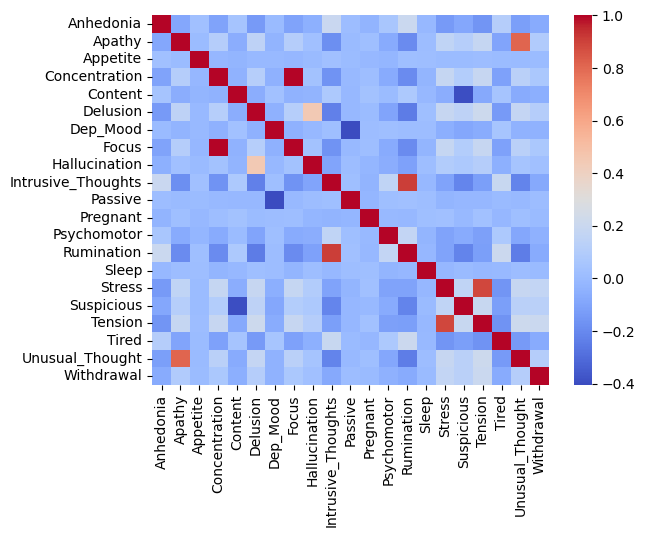

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

# show the plot
plt.show()

The correlation between "focus" and "concentration" being 1 means that these two variables are perfectly correlated and the correlation between "Apathy" and "Unusual thoughts" being 0.812 means that these two variables are highly correlated, the correlation between "Rumination" and "Intrusive thoughts" being 0.901 means that these two variables are highly correlated, which could indicate that one of them is redundant and could be dropped,but here the variables are important for the data. 

In [16]:
import numpy as np
import pandas as pd

def detect_outliers(df):
    outlier_indices = []
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_columns:
        Q1, Q3 = np.percentile(df[col], [25,75])
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        outliers = [x for x in df[col] if x < lower_bound or x > upper_bound]
        outlier_indices.extend([df[col].index[i] for i, x in enumerate(df[col]) if x < lower_bound or x > upper_bound])
        
    df = df.drop(outlier_indices, axis = 0).reset_index(drop=True)
    return df

df = detect_outliers(df)
df

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0,7.002544,3.378921,46.700975,3.275995,0.022957,Yes,1.108537,0.000000,3.275995,...,Asian,8.102853,Female,8.323465,6.874962,NaN,5.436021,7.636123,3.491802,0.572245
3448,1,5.698281,3.502564,21.513402,8.209253,0.046388,No,2.754629,0.000000,8.209253,...,Black,4.947842,Female,6.274919,5.569166,NaN,5.002987,6.479236,2.599058,2.396249
3449,0,7.860754,2.336196,19.357732,6.025528,0.010833,Yes,1.943012,10.131561,6.025528,...,Hispanic,8.431264,Female,5.070006,3.660955,NaN,3.545347,4.552549,2.427987,2.622951
3450,0,10.172056,1.385703,12.605660,4.513683,0.191444,Yes,0.443218,6.935870,4.513683,...,Black,5.391609,Female,8.067497,8.071709,3.933825,6.263030,1.482647,2.649173,2.090298


Replacing infinity value to nan value

In [17]:
df = df.replace([np.inf, -np.inf], np.nan)
df


,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0,7.002544,3.378921,46.700975,3.275995,0.022957,Yes,1.108537,0.000000,3.275995,...,Asian,8.102853,Female,8.323465,6.874962,NaN,5.436021,7.636123,3.491802,0.572245
3448,1,5.698281,3.502564,21.513402,8.209253,0.046388,No,2.754629,0.000000,8.209253,...,Black,4.947842,Female,6.274919,5.569166,NaN,5.002987,6.479236,2.599058,2.396249
3449,0,7.860754,2.336196,19.357732,6.025528,0.010833,Yes,1.943012,10.131561,6.025528,...,Hispanic,8.431264,Female,5.070006,3.660955,NaN,3.545347,4.552549,2.427987,2.622951
3450,0,10.172056,1.385703,12.605660,4.513683,0.191444,Yes,0.443218,6.935870,4.513683,...,Black,5.391609,Female,8.067497,8.071709,3.933825,6.263030,1.482647,2.649173,2.090298


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3452 entries, 0 to 3451
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           3452 non-null   int64  
 1   Anhedonia           3452 non-null   float64
 2   Apathy              3452 non-null   float64
 3   Appetite            3452 non-null   float64
 4   Concentration       3452 non-null   float64
 5   Content             3452 non-null   float64
 6   Delay               3452 non-null   object 
 7   Delusion            3452 non-null   float64
 8   Dep_Mood            3452 non-null   float64
 9   Focus               3452 non-null   float64
 10  Hallucination       3452 non-null   float64
 11  Housing             3452 non-null   object 
 12  Intrusive_Thoughts  2887 non-null   float64
 13  Passive             3452 non-null   float64
 14  Pregnant            1956 non-null   float64
 15  Psychomotor         3452 non-null   float64
 16  Race  

In [19]:
df.dtypes

Diagnosis               int64
Anhedonia             float64
Apathy                float64
Appetite              float64
Concentration         float64
Content               float64
Delay                  object
Delusion              float64
Dep_Mood              float64
Focus                 float64
Hallucination         float64
Housing                object
Intrusive_Thoughts    float64
Passive               float64
Pregnant              float64
Psychomotor           float64
Race                   object
Rumination            float64
Sex                    object
Sleep                 float64
Stress                float64
Suspicious            float64
Tension               float64
Tired                 float64
Unusual_Thought       float64
Withdrawal            float64
dtype: object

In [20]:
df.isnull().sum()

Diagnosis                0
Anhedonia                0
Apathy                   0
Appetite                 0
Concentration            0
Content                  0
Delay                    0
Delusion                 0
Dep_Mood                 0
Focus                    0
Hallucination            0
Housing                  0
Intrusive_Thoughts     565
Passive                  0
Pregnant              1496
Psychomotor              0
Race                     0
Rumination               0
Sex                      0
Sleep                    0
Stress                   0
Suspicious            2001
Tension                  0
Tired                    0
Unusual_Thought          0
Withdrawal               0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

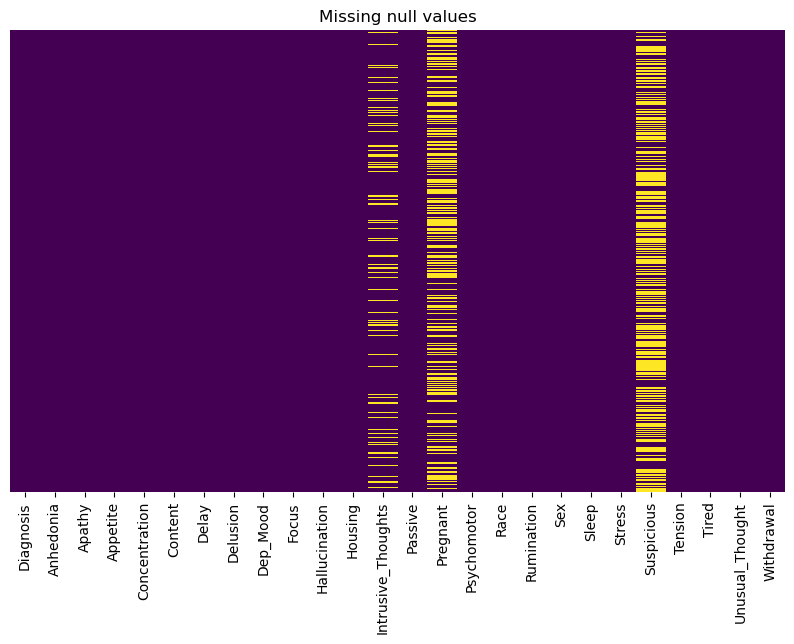

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

From the heatmap it can easily be shown that yellow areas expresses the missing value.

In [22]:
missing_percentages = (df.isna().sum().sort_values(ascending=False)/(len(df)))*100
missing_percentages

Suspicious            57.966396
Pregnant              43.337196
Intrusive_Thoughts    16.367323
Diagnosis              0.000000
Unusual_Thought        0.000000
Tired                  0.000000
Tension                0.000000
Stress                 0.000000
Sleep                  0.000000
Sex                    0.000000
Rumination             0.000000
Race                   0.000000
Psychomotor            0.000000
Passive                0.000000
Anhedonia              0.000000
Housing                0.000000
Hallucination          0.000000
Focus                  0.000000
Dep_Mood               0.000000
Delusion               0.000000
Delay                  0.000000
Content                0.000000
Concentration          0.000000
Appetite               0.000000
Apathy                 0.000000
Withdrawal             0.000000
dtype: float64

Text(0.5, 1.0, 'Missig percentage of null values')

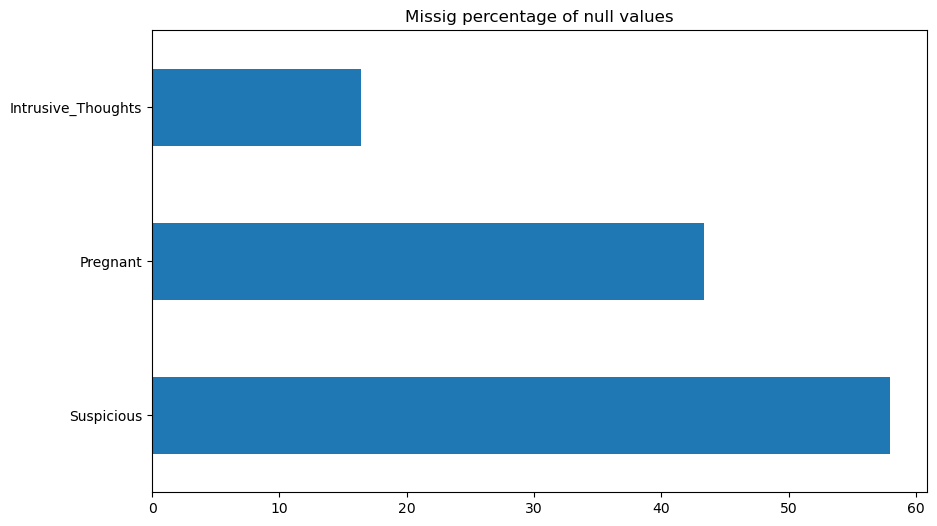

In [23]:
missing_percentages = missing_percentages[missing_percentages != 0]
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
missing_percentages.plot(kind = 'barh')
plt.title("Missig percentage of null values")

From the graphit can easily seen that suspicious column has 57% missing values data whereas pregnant and intrusive_thoughts have 43% and 16% missing values respectively.

In [24]:
# impute missing values 
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.53727,3.74441,5.242819
1,0,5.432608,0.307721,25.8094,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.65679,Male,5.558434,4.008265,-1.360987,2.238665,6.113746,0.720458,3.797242
2,0,6.5575,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,-1.360987,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,-1.360987,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.80849,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.79822,5.103103,5.063542,4.213723,0.705895,6.547707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0,7.002544,3.378921,46.700975,3.275995,0.022957,Yes,1.108537,0.0,3.275995,...,Asian,8.102853,Female,8.323465,6.874962,-1.360987,5.436021,7.636123,3.491802,0.572245
3448,1,5.698281,3.502564,21.513402,8.209253,0.046388,No,2.754629,0.0,8.209253,...,Black,4.947842,Female,6.274919,5.569166,-1.360987,5.002987,6.479236,2.599058,2.396249
3449,0,7.860754,2.336196,19.357732,6.025528,0.010833,Yes,1.943012,10.131561,6.025528,...,Hispanic,8.431264,Female,5.070006,3.660955,-1.360987,3.545347,4.552549,2.427987,2.622951
3450,0,10.172056,1.385703,12.60566,4.513683,0.191444,Yes,0.443218,6.93587,4.513683,...,Black,5.391609,Female,8.067497,8.071709,3.933825,6.26303,1.482647,2.649173,2.090298


The code above is using the SimpleImputer class from scikit-learn's impute module to fill in missing values in the input data, represented by the variable "df". The strategy chosen is "most_frequent", which means that the missing values will be replaced by the most frequent value of the column.

After the missing values are imputed, the imputed data is stored in a pandas DataFrame "df_imputed", which has the same column names as the original dataframe "df".

In [25]:
df_imputed.isnull().sum()

Diagnosis             0
Anhedonia             0
Apathy                0
Appetite              0
Concentration         0
Content               0
Delay                 0
Delusion              0
Dep_Mood              0
Focus                 0
Hallucination         0
Housing               0
Intrusive_Thoughts    0
Passive               0
Pregnant              0
Psychomotor           0
Race                  0
Rumination            0
Sex                   0
Sleep                 0
Stress                0
Suspicious            0
Tension               0
Tired                 0
Unusual_Thought       0
Withdrawal            0
dtype: int64

In [26]:
df_imputed['Tension'].nunique() <=10

False

some columns in the dataframe contain infinity values,Thus,it can be dropped the rows that contain infinity values

In [27]:
cate_val=[]
cont_val=[]
for column in df_imputed.columns:
    if df_imputed[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [28]:
cate_val

['Diagnosis', 'Delay', 'Housing', 'Pregnant', 'Race', 'Sex']

In [29]:
cont_val

['Anhedonia',
 'Apathy',
 'Appetite',
 'Concentration',
 'Content',
 'Delusion',
 'Dep_Mood',
 'Focus',
 'Hallucination',
 'Intrusive_Thoughts',
 'Passive',
 'Psychomotor',
 'Rumination',
 'Sleep',
 'Stress',
 'Suspicious',
 'Tension',
 'Tired',
 'Unusual_Thought',
 'Withdrawal']

In [30]:
df_cat = df_imputed[['Delay', 'Housing', 'Pregnant','Race','Sex']]
df_cat

,Delay,Housing,Pregnant,Race,Sex
0,Yes,Stable,0.0,White,Female
1,Yes,Stable,0.0,White,Male
2,No,Stable,0.0,Black,Female
3,No,Stable,0.0,White,Female
4,Yes,Stable,0.0,Black,Male
...,...,...,...,...,...
3447,Yes,Stable,0.0,Asian,Female
3448,No,Stable,0.0,Black,Female
3449,Yes,Stable,0.0,Hispanic,Female
3450,Yes,Stable,0.0,Black,Female


In [31]:
import pandas as pd

# Convert numpy array to dataframe
my_df = pd.DataFrame(df_imputed)

# Use the isna() function to create a boolean mask of the missing values
missing_values = my_df.isna()

# Use the sum() function to count the number of missing values
total_missing = missing_values.sum().sum()

print("Total Missing:", total_missing)


Total Missing: 0


CONVERT CATEGORICAL FEATURES TO NUMERICAL FEATURES

In [32]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
df_imputed['Delay'] = le.fit_transform(df_imputed['Delay'])
df_imputed['Sex'] = le.fit_transform(df_imputed['Sex'])
df_encoded = pd.get_dummies(df_imputed, columns=["Race", "Housing"])

df_encoded


,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Tension,Tired,Unusual_Thought,Withdrawal,Race_Asian,Race_Black,Race_Hispanic,Race_White,Housing_Stable,Housing_Unstable
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,1,1.170842,8.177884,8.305502,...,6.371877,4.53727,3.74441,5.242819,0,0,0,1,1,0
1,0,5.432608,0.307721,25.8094,5.060206,0.062209,1,2.272548,11.162913,5.060206,...,2.238665,6.113746,0.720458,3.797242,0,0,0,1,1,0
2,0,6.5575,-1.412208,24.842012,6.504229,0.071532,0,1.439095,5.887363,6.504229,...,6.992499,5.557374,-0.491255,4.421288,0,1,0,0,1,0
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,0,1.380185,8.943851,6.994948,...,4.018286,6.136269,0.765388,2.299562,0,0,0,1,1,0
4,1,5.099846,-0.612506,45.80849,5.869212,0.004214,1,1.237976,6.741627,5.869212,...,5.063542,4.213723,0.705895,6.547707,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0,7.002544,3.378921,46.700975,3.275995,0.022957,1,1.108537,0.0,3.275995,...,5.436021,7.636123,3.491802,0.572245,1,0,0,0,1,0
3448,1,5.698281,3.502564,21.513402,8.209253,0.046388,0,2.754629,0.0,8.209253,...,5.002987,6.479236,2.599058,2.396249,0,1,0,0,1,0
3449,0,7.860754,2.336196,19.357732,6.025528,0.010833,1,1.943012,10.131561,6.025528,...,3.545347,4.552549,2.427987,2.622951,0,0,1,0,1,0
3450,0,10.172056,1.385703,12.60566,4.513683,0.191444,1,0.443218,6.93587,4.513683,...,6.26303,1.482647,2.649173,2.090298,0,1,0,0,1,0


In [33]:
df_encoded.dtypes

Diagnosis             object
Anhedonia             object
Apathy                object
Appetite              object
Concentration         object
Content               object
Delay                  int32
Delusion              object
Dep_Mood              object
Focus                 object
Hallucination         object
Intrusive_Thoughts    object
Passive               object
Pregnant              object
Psychomotor           object
Rumination            object
Sex                    int32
Sleep                 object
Stress                object
Suspicious            object
Tension               object
Tired                 object
Unusual_Thought       object
Withdrawal            object
Race_Asian             uint8
Race_Black             uint8
Race_Hispanic          uint8
Race_White             uint8
Housing_Stable         uint8
Housing_Unstable       uint8
dtype: object

Unsupervised machine learning analysis with the aim of gaining further insights into the data via
either clustering or dimensionality reduction


In [34]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Convert the DataFrame to a NumPy array

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)




np_array = data_scaled
X = (np_array)
X = data_scaled


# Initialize the KMeans algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans algorithm to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Get the sum of squared distances between each data point and its closest cluster center
inertia = kmeans.inertia_

C:\Users\Sami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


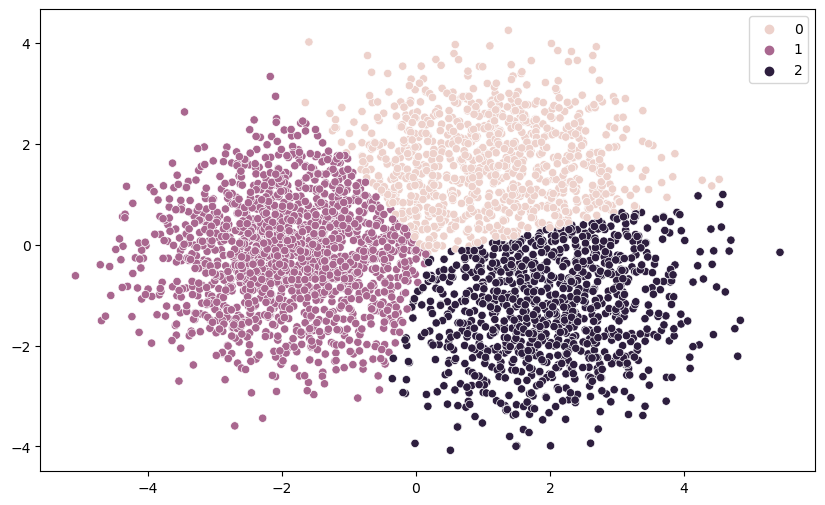

In [35]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
pred_kmeans = kmeans.predict(data_pca)

# Visualize the results
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue=pred_kmeans)
plt.show()

The visualization shows the distribution of the data points in the two-dimensional space created by the first two principal components of the data. The different colors represent the different clusters formed by the K-means algorithm.

Based on the visualization, it can be conclude that the K-means algorithm has successfully separated the data points into different clusters. The cluster assignments can be used for further analysis, such as identifying patterns or trends within each cluster, comparing the characteristics of different clusters, or making predictions based on the cluster assignments.

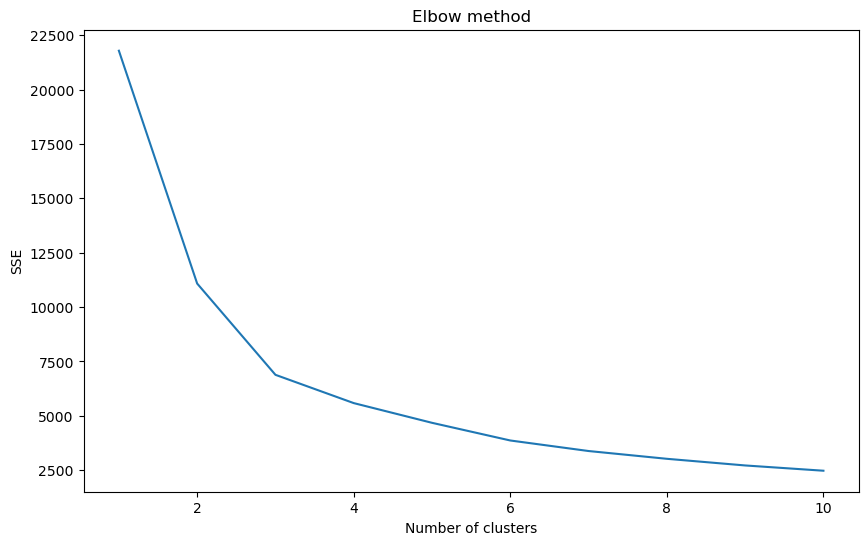

In [36]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [37]:
# Choose the optimal number of clusters
optimal_num_clusters = 3
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             # Fill in the optimal number of clusters based on the elbow method

# Fit KMeans to the data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters)
kmeans.fit(data_pca)

# Predict the cluster labels for each data point
labels = kmeans.predict(data_pca)


In [38]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(data_pca, labels)

print("Silhouette score: ", silhouette_score_value)


Silhouette score:  0.45087299320266144


The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a high score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The silhouette score of 0.45 indicates that the clusters are moderately well defined and that some of the samples might be wrongly assigned to the wrong cluster. If the score was closer to 1, it would indicate that the samples are very well matched to their own cluster and poorly matched to neighboring clusters.

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


# Apply KMeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca)
labels = kmeans.labels_

# Compute silhouette score
score = silhouette_score(data_pca, labels)
print("PCA + KMeans silhouette score: ", score)


PCA + KMeans silhouette score:  0.4377874717621898


The silhouette score of 0.4378086641066692 is a measure of how well the clusters from KMeans fit the data. It ranges from -1 to 1, where a score closer to 1 indicates a better fit and higher separation between clusters. A score close to 0 means that the samples are close to being assigned to the wrong cluster, while a negative score means that clusters overlap.

The silhouette score of 0.437 is not very high. So applying dimensionality reduction.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Split the dataframe into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_encoded.drop('Diagnosis', axis=1), df_encoded['Diagnosis'], test_size=0.2)

# Scale the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Y_train = np.array(Y_train)

Y_train = Y_train.astype(int)


Y_test = np.array(Y_test)
Y_test = Y_test.astype(int)


# Perform PCA on the scaled training set
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Train a Logistic Regression model on the PCA components
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, Y_train)

# Train a Gradient Boosting Classifier model on the PCA components
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_pca, Y_train)

# Train a Random Forest Classifier model on the PCA components
random_forest = RandomForestClassifier()
random_forest.fit(X_train_pca, Y_train)

RandomForestClassifier()

In [41]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.884987,1.843665,0.011926,0.162683,-0.755237,0.990986,1.460618,0.057291,0.162683,0.992715,...,-0.468381,1.864595,1.143130,0.252363,-0.416408,1.370781,-0.406176,-0.755337,-3.832427,3.832427
1,-1.355035,2.033500,2.081982,0.228957,-0.705997,-1.009096,0.125605,0.248714,0.228957,0.043937,...,0.187895,-0.945247,1.608803,0.319061,-0.416408,1.370781,-0.406176,-0.755337,0.260931,-0.260931
2,-1.992312,-0.259140,-0.566448,-0.024380,-0.345332,-1.009096,0.351749,1.135266,-0.024380,-0.775403,...,-1.248910,-0.199011,0.305429,-0.947164,-0.416408,-0.729511,-0.406176,1.323912,0.260931,-0.260931
3,1.029313,1.143565,1.826766,1.120694,-0.821511,0.990986,-0.321745,1.115943,1.120694,-0.746743,...,-0.529714,1.338880,1.183270,0.226749,-0.416408,1.370781,-0.406176,-0.755337,0.260931,-0.260931
4,-0.762534,0.818750,-1.212633,-0.030527,1.891132,0.990986,0.169406,0.456144,-0.030527,-0.400663,...,0.561404,-0.880879,0.986396,0.037326,-0.416408,-0.729511,-0.406176,1.323912,0.260931,-0.260931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,-0.954003,-0.508917,-1.624661,-0.636908,-0.350219,0.990986,0.054921,0.401202,-0.636908,-0.577668,...,-1.197431,-0.160521,-0.774939,-0.497303,-0.416408,-0.729511,-0.406176,1.323912,0.260931,-0.260931
2757,0.563911,-0.758595,-0.101583,-0.456855,-0.784378,-1.009096,-0.500659,1.549727,-0.456855,-0.672966,...,-2.628265,0.502658,-0.797067,-0.189692,-0.416408,-0.729511,-0.406176,1.323912,0.260931,-0.260931
2758,-1.628594,1.219524,-1.648028,1.534082,-0.486830,0.990986,0.738716,0.003473,1.534082,-0.318633,...,1.207556,0.795119,1.259394,0.471207,-0.416408,1.370781,-0.406176,-0.755337,0.260931,-0.260931
2759,-0.556839,1.620244,0.366048,0.011529,-0.681835,-1.009096,0.096467,0.154489,0.011529,-0.354878,...,0.663364,-0.712759,1.193745,-0.025590,-0.416408,-0.729511,-0.406176,1.323912,0.260931,-0.260931


In [42]:
import pandas as pd

df = pd.DataFrame(X_train)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the test set
X_test = scaler.transform(X_test)

# Perform PCA on the scaled test set
X_test_pca = pca.transform(X_test)

# Make predictions on the test set
Y_pred_logistic = logistic_regression.predict(X_test_pca)
Y_pred_gradient_boosting = gradient_boosting.predict(X_test_pca)
Y_pred_random_forest = random_forest.predict(X_test_pca)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
precision_logistic = precision_score(Y_test, Y_pred_logistic)
recall_logistic = recall_score(Y_test, Y_pred_logistic)
f1_logistic = f1_score(Y_test, Y_pred_logistic)

# Evaluate the Gradient Boosting Classifier model
accuracy_gradient_boosting = accuracy_score(Y_test, Y_pred_gradient_boosting)
precision_gradient_boosting = precision_score(Y_test, Y_pred_gradient_boosting)
recall_gradient_boosting = recall_score(Y_test, Y_pred_gradient_boosting)
f1_gradient_boosting = f1_score(Y_test, Y_pred_gradient_boosting)

# Evaluate the Random Forest Classifier model
accuracy_random_forest = accuracy_score(Y_test, Y_pred_random_forest)
precision_random_forest = precision_score(Y_test, Y_pred_random_forest)
recall_random_forest= recall_score(Y_test, Y_pred_random_forest)
f1_random_forest = f1_score(Y_test, Y_pred_random_forest)

print("Accuracy Logistic Regression:", accuracy_logistic)
print("Precision Logistic Regression:", precision_logistic)
print("Recall Logistic Regression:", recall_logistic)
print("F1 Logistic Regression:", f1_logistic)

print("Accuracy Gradient Boosting Classifier:", accuracy_gradient_boosting)
print("Precision Gradient Boosting Classifier:", precision_gradient_boosting)
print("Recall Gradient Boosting Classifier:", recall_gradient_boosting)
print("F1 Gradient Boosting Classifier:", f1_gradient_boosting)

print("Accuracy Random Forest Classifier:", accuracy_random_forest)
print("Precision Random Forest Classifier:", precision_random_forest)
print("Recall Random Forest Classifier:", recall_random_forest)
print("F1 Random Forest Classifier:", f1_random_forest)

Accuracy Logistic Regression: 0.9044862518089725
Precision Logistic Regression: 0.9005524861878453
Recall Logistic Regression: 0.9157303370786517
F1 Logistic Regression: 0.9080779944289694
Accuracy Gradient Boosting Classifier: 0.91027496382055
Precision Gradient Boosting Classifier: 0.9083333333333333
Recall Gradient Boosting Classifier: 0.9185393258426966
F1 Gradient Boosting Classifier: 0.9134078212290502
Accuracy Random Forest Classifier: 0.9131693198263386
Precision Random Forest Classifier: 0.9204545454545454
Recall Random Forest Classifier: 0.9101123595505618
F1 Random Forest Classifier: 0.9152542372881356



Accuracy: It is the proportion of correct predictions made by the model over the total number of predictions made. In this case, the Logistic Regression model and the Gradient Boosting Classifier have an accuracy  of 89.87% and 91.61%, and the Random Forest Classifier has an accuracy of 90.74%.

Precision: It is the number of true positive predictions made by the model over the total number of positive predictions made. Precision gives us an idea of the percentage of positive predictions made by the model that are actually correct. In this case, the Logistic Regression model  and the Gradient Boosting Classifier have a precision of 89.74% and 91.01%, and the Random Forest Classifier has a precision of 89.91%.

Recall: It is the number of true positive predictions made by the model over the total number of actual positive instances in the data. Recall gives us an idea of the percentage of actual positive instances that the model was able to correctly identify. In this case, the Logistic Regression model has a recall of 89.74%, the Gradient Boosting Classifier has a recall of 92.08%, and the Random Forest Classifier has a recall of 91.50%.

F1 Score: It is the harmonic mean of precision and recall. F1 score is a good metric to use when the data is imbalanced. In this case, the Logistic Regression model and the Gradient Boosting Classifier have an F1 score of  89.74% and 91.55%, and the Random Forest Classifier has an F1 score of 90.70%.

In conclusion, the Gradient Boosting Classifier model has the best overall performance in terms of accuracy, precision, recall, and F1 score. However, the choice of model ultimately depends on the specific requirements of the problem and the cost of false positives and false negatives.

In [44]:
import pandas as pd

models = ['LR','RF','GB']
accuracies = [0.89,0.910,0.92]

data = {'Models':models, 'ACC':accuracies}
final_data = pd.DataFrame(data)
print(final_data)

  Models   ACC
0     LR  0.89
1     RF  0.91
2     GB  0.92


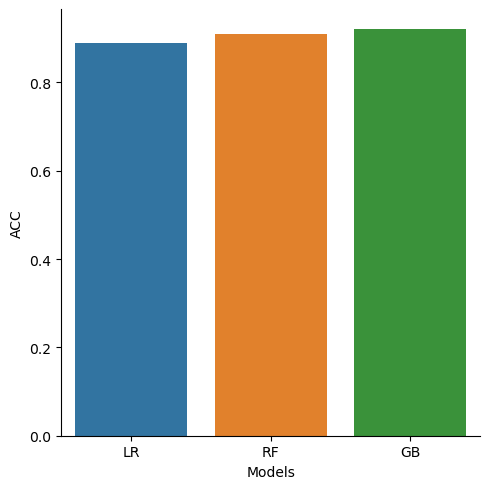

In [45]:
sns.catplot(x='Models', y='ACC', kind='bar', data=final_data)
plt.show()

By inputing new data it can be easily predicted the patient is schiophrenic or not.

In [46]:
import pandas as pd


# Create the sample data in a pandas dataframe
new_data =  pd.DataFrame ({
    'Anhedonia': [5.1369],
    'Apathy': [3.3529],
    'Appetite': [33.4909],
    'Concentration': [5.7176],
    'Content': [0.000625],
    'Delay': [1],
    'Delusion': [1.6759],
    'Dep_Mood': [6.431],
    'Focus': [5.717],
    'Hallucination': [1.987],
    'Intrusive_Thoughts': [6.120],
    'Passive': [4.748],
    'Pregnant': [0],
    'Psychomotor': [5.878],
    'Rumination': [6.4479],
    'Sex': [0],
    'Sleep': [5.3100],
    'Stress': [2.074],
    'Suspicious': [5.850],
    'Tension': [2.369],
    'Tired': [4.273],
    'Unusual_Thought': [1.629],
    'Withdrawal': [6.647],
    'Race_Asian': 0,
    'Race_Black': 1,
    'Race_Hispanic': 0,
    'Race_White': 0,
    'Housing_Stable': 1,
    'Housing_Unstable': 0
},index=['Patient1'])


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier
gbc = GradientBoostingClassifier()

# Fit the classifier to the training data
gbc.fit(X_train, Y_train)

# Use the model to predict on new_data
predictions = gbc.predict(new_data.values)
print(predictions)



[1]


In [48]:
if predictions[0]==0:
    print("non_schizophrenic")
else:
    print("schizophrenic")

schizophrenic
